In [1]:
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


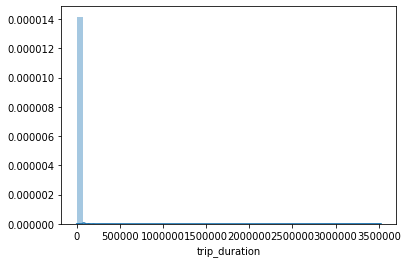

In [5]:
sns.distplot(data['trip_duration'])

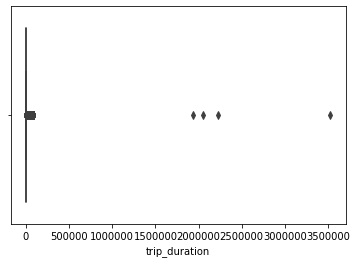

In [6]:
sns.boxplot(data['trip_duration'])

В данных есть несколько выбросов, которые делают невозможной визуализацию <br>
Удалим их


In [7]:
data = data[data['trip_duration'] < 500000]

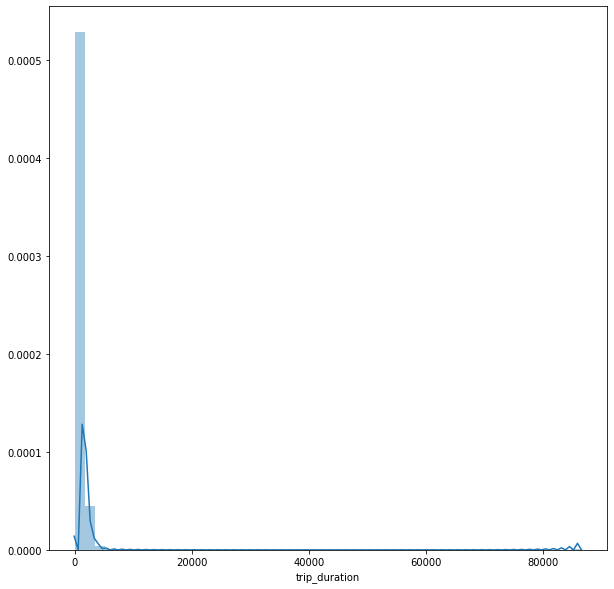

In [8]:
plt.figure(figsize=(10, 10))
sns.distplot(data['trip_duration'])

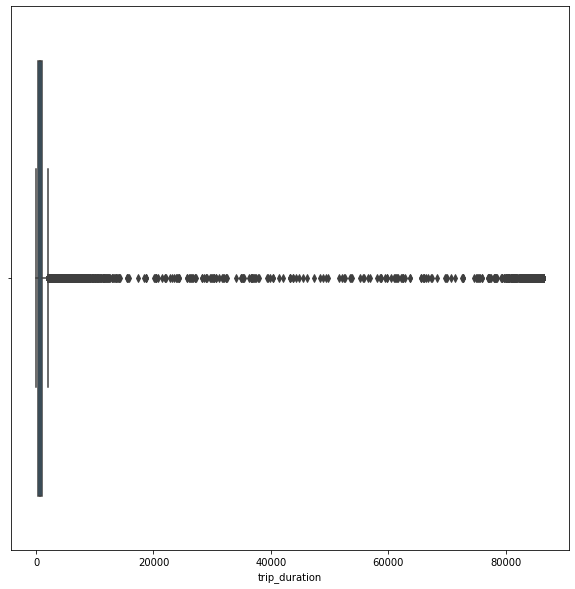

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(data['trip_duration'])

Из визуализаций видно, что в данных очень много выбросов и данные не распределены нормально


In [10]:
corr = data.corr()

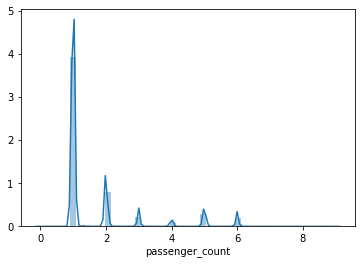

In [19]:
sns.distplot(data['passenger_count'])

In [11]:
corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007825,0.001736,0.001528,0.004496,0.035791
passenger_count,0.287415,1.000000,0.002170,-0.005127,-0.000343,-0.002762,0.014717
pickup_longitude,0.007825,0.002170,1.000000,0.022580,0.783586,0.100189,0.040457
pickup_latitude,0.001736,-0.005127,0.022580,1.000000,0.114885,0.494042,-0.044155
dropoff_longitude,0.001528,-0.000343,0.783586,0.114885,1.000000,0.124873,0.024348
dropoff_latitude,0.004496,-0.002762,0.100189,0.494042,0.124873,1.000000,-0.034139
trip_duration,0.035791,0.014717,0.040457,-0.044155,0.024348,-0.034139,1.000000


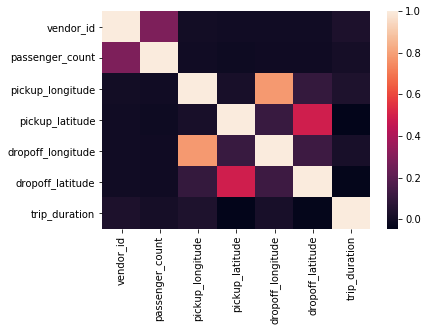

In [12]:
sns.heatmap(corr)

Исходя из корреляции признаков, в наборе данных не имеется значений, имеющих высокий коэффициент линейной корреляции с целевым признаком. <br>
Так же в наборе данных нет признаков с высоким коэффициентом корреляции

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2).fit(data.iloc[:, 4:8])

In [15]:
x = pca.transform(data.iloc[:, 4:8])
y = data['trip_duration']

In [16]:
x.shape

(1458640, 2)

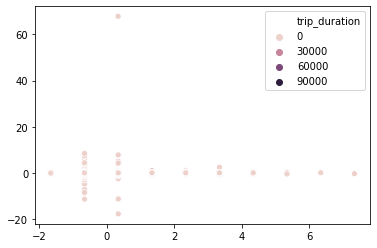

In [17]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)